Ratings columns: ['user_id', 'anime_id', 'rating']
Anime columns: ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']
=== Ratings Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int64
 1   anime_id     int64
 2   user_rating  int64
dtypes: int64(3)
memory usage: 178.8 MB
None
            user_id      anime_id   user_rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01
Missing values in ratings:
user_id        0
anime_id       0
user_rating    0
dtype: int64

=== Anime Dataset Info ===
<class

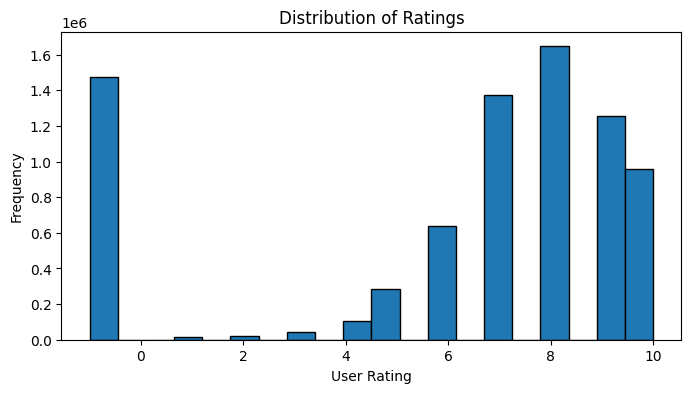

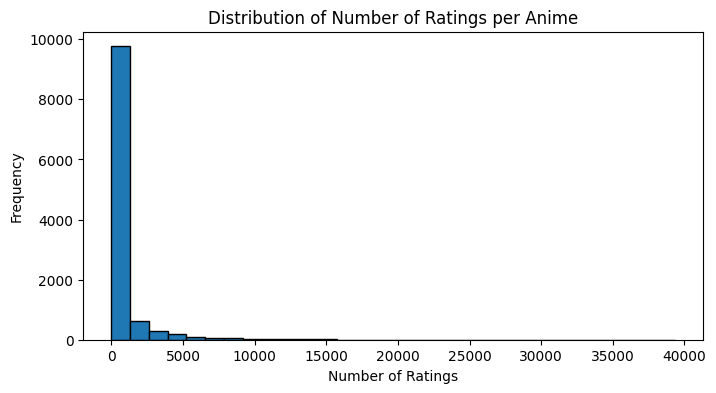


Top 10 Genres in Anime Dataset:
Comedy       4645
Action       2845
Adventure    2348
Fantasy      2309
Sci-Fi       2070
Drama        2016
Shounen      1712
Kids         1609
Romance      1464
School       1220
Name: count, dtype: int64


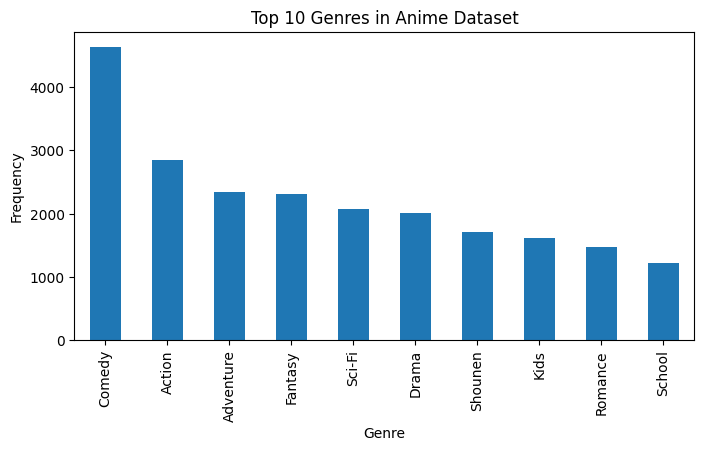


Anime Types Distribution:
type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64


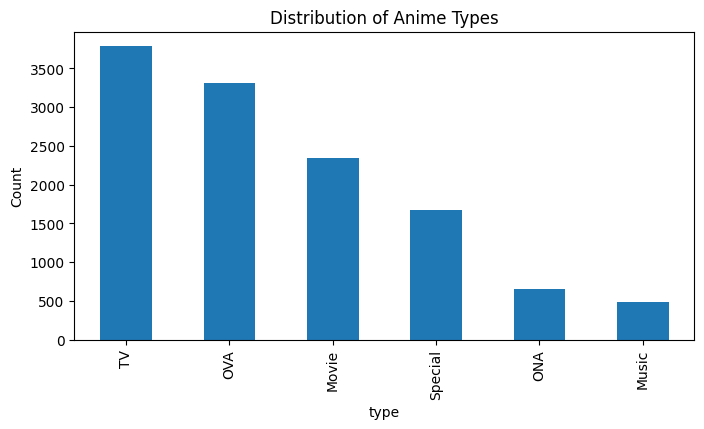

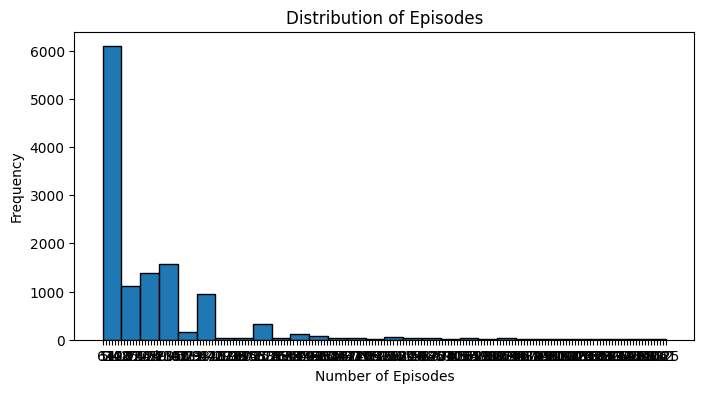


Correlation Matrix for Numeric Columns in Anime Dataset:
          anime_id    rating   members
anime_id  1.000000 -0.284625 -0.080071
rating   -0.284625  1.000000  0.387979
members  -0.080071  0.387979  1.000000


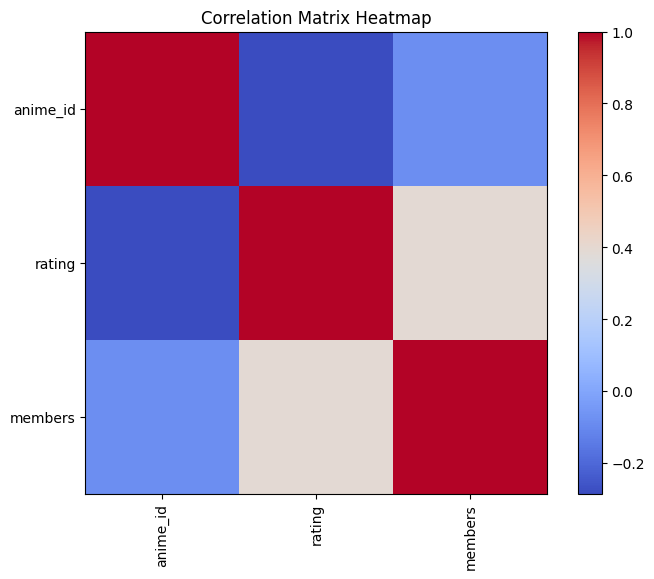


=== Anime Dataset with Average User Ratings ===
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  avg_user_rating  
0   200630         8.297863  
1   793665         8.028933  
2   114262         7.956710  
3   673572         8.126796  
4   151266         7.7119

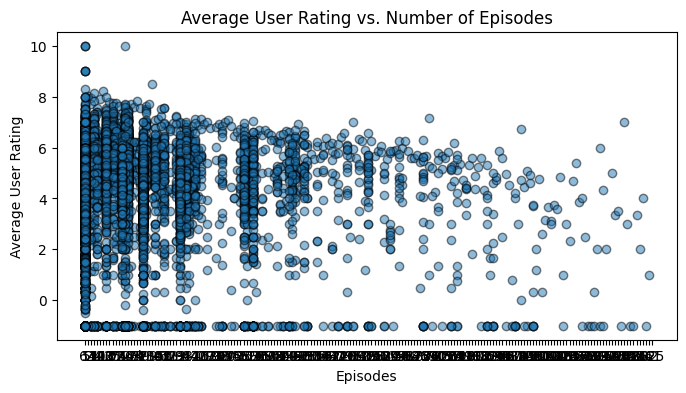

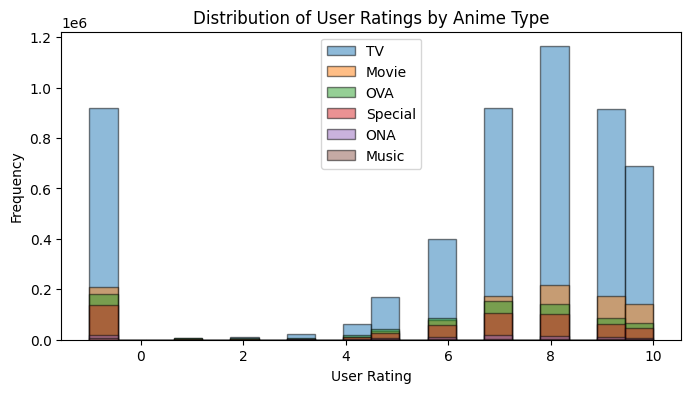

Deeper exploratory analysis complete.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ratings = pd.read_csv('/content/rating.csv')
anime = pd.read_csv('/content/anime.csv')

print("Ratings columns:", ratings.columns.tolist())
print("Anime columns:", anime.columns.tolist())

# Rename the 'rating' column to 'user_rating' for consistency and clarity in our analysis and later model building
if 'rating' in ratings.columns:
    ratings.rename(columns={'rating': 'user_rating'}, inplace=True)
elif 'user_rating' not in ratings.columns:
    raise KeyError("Rating column not found in the ratings dataset. Check the column names above.")


# Basic Overview and Data Quality

print("=== Ratings Dataset Info ===")
print(ratings.info())
print(ratings.describe())
print("Missing values in ratings:")
print(ratings.isnull().sum())

print("\n=== Anime Dataset Info ===")
print(anime.info())
print(anime.describe(include='all'))
print("Missing values in anime:")
print(anime.isnull().sum())

# The insights from this section:
# - We check for missing values and anomalies, which is crucial for data cleaning
# - For a recommendation system, clean data means more reliable training and predictions


# 2. Ratings Dataset Analysis


# a. Distribution of Ratings
# This histogram shows that most ratings cluster around a moderate value (around 7)
# Since ratings are centered, extreme values are rare. When building the model,
# normalization or bias adjustments may be needed to calibrate recommendations.

plt.figure(figsize=(8, 4))
plt.hist(ratings['user_rating'], bins=20, edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.show()

# b. Distribution of Number of Ratings per Anime
# The histogram is heavily right-skewed, indicating that a few anime are extremely popular,
# while the majority have only a few ratings
# This popularity bias can lead to the cold-start problem
# A robust recommendation system may incorporate hybrid approaches (combining collaborative
# and content-based methods) to better serve items with few ratings

ratings_count = ratings['anime_id'].value_counts()
plt.figure(figsize=(8, 4))
plt.hist(ratings_count, bins=30, edgecolor='black')
plt.title("Distribution of Number of Ratings per Anime")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()


# 3. Anime Dataset Analysis

# a. Genre Analysis
# The following analysis splits the 'genre' column and counts each occurrence
# The bar chart will show that genres like Action, Adventure, and Fantasy dominate
# Genre information is critical for content-based recommendations and can help
# in creating user profiles based on genre preferences

if 'genre' in anime.columns:
    genres_series = anime['genre'].dropna().str.split(', ')
    all_genres = [genre for sublist in genres_series for genre in sublist]
    genre_counts = pd.Series(all_genres).value_counts()
    print("\nTop 10 Genres in Anime Dataset:")
    print(genre_counts.head(10))

    plt.figure(figsize=(8, 4))
    plt.title("Top 10 Genres in Anime Dataset")
    plt.xlabel("Genre")
    plt.ylabel("Frequency")
    # This bar chart visually confirms the dominance of certain genres,
    # which can be incorporated as key features in a recommendation model
    genre_counts.head(10).plot(kind='bar')
    plt.show()

# b. Anime Type Distribution (e.g., TV, Movie, OVA, etc.)
# The bar chart below shows that TV series are the most common in the dataset
# Recognizing that TV series dominate allows us to tailor recommendations
# accordingly and also handle type-specific filtering if a user has a clear preference
if 'type' in anime.columns:
    type_counts = anime['type'].value_counts()
    print("\nAnime Types Distribution:")
    print(type_counts)
    plt.figure(figsize=(8, 4))
    plt.title("Distribution of Anime Types")
    plt.xlabel("Type")
    plt.ylabel("Count")
    # This visualization helps us understand content type distribution,
    # which may be used to segment or filter recommendations based on user interests
    type_counts.plot(kind='bar')
    plt.show()

# c. Episodes Distribution
# The histogram of episodes indicates that most anime have fewer than 50 episodes,
# but there is a long tail representing some long-running series
# The number of episodes can serve as a proxy for content depth and user commitment
# It might be useful as a feature in assessing the viewing commitment required
if 'episodes' in anime.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(anime['episodes'].dropna(), bins=30, edgecolor='black')
    plt.title("Distribution of Episodes")
    plt.xlabel("Number of Episodes")
    plt.ylabel("Frequency")
    plt.show()

# d. Correlation Analysis among Numeric Columns in Anime Dataset
# The heatmap of the correlation matrix reveals the relationships between numeric features
# A slight positive correlation might exist between the number of episodes and average ratings
# When selecting features for the recommendation model, we can consider these relationships
# Less correlated features reduce redundancy and may improve model performance
numeric_cols = anime.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = anime[numeric_cols].corr()
    print("\nCorrelation Matrix for Numeric Columns in Anime Dataset:")
    print(corr_matrix)
    plt.figure(figsize=(8, 6))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# 4. Merging Datasets and Further Analysis

# Merge ratings and anime datasets on 'anime_id'
merged_df = pd.merge(ratings, anime, on='anime_id', how='inner')

# Compute the average user rating for each anime using the merged dataset
# This average rating can be used as a baseline for recommendation models
avg_rating = merged_df.groupby('anime_id')['user_rating'].mean().reset_index()
avg_rating.columns = ['anime_id', 'avg_user_rating']

# Merge the average ratings back into the anime dataset for further analysis
anime_with_avg = pd.merge(anime, avg_rating, on='anime_id', how='left')
print("\n=== Anime Dataset with Average User Ratings ===")
print(anime_with_avg.head())

# Relationship between average user rating and number of episodes
# The scatter plot shows that while there is no strong linear relationship,
# anime with a moderate number of episodes tend to have higher average ratings
# This relationship can inform feature engineering by highlighting an optimal range of content length.
if 'episodes' in anime_with_avg.columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(anime_with_avg['episodes'], anime_with_avg['avg_user_rating'], alpha=0.5, edgecolor='black')
    plt.title("Average User Rating vs. Number of Episodes")
    plt.xlabel("Episodes")
    plt.ylabel("Average User Rating")
    plt.show()

# This section plots histograms of user ratings broken down by anime type
# The similar overall distributions, with slight variations, suggest that while user perception is consistent,
# there may be subtle differences in rating patterns that can be exploited by a recommendation system to personalize suggestions
if 'type' in merged_df.columns:
    plt.figure(figsize=(8, 4))
    unique_types = merged_df['type'].dropna().unique()
    for t in unique_types:
        subset = merged_df[merged_df['type'] == t]
        plt.hist(subset['user_rating'], bins=20, alpha=0.5, edgecolor='black', label=str(t))
    plt.title("Distribution of User Ratings by Anime Type")
    plt.xlabel("User Rating")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


# Final Insights

# 1. The concentrated distribution of ratings (mostly moderate values) suggests that users have a common baseline,
#    implying that normalization and bias adjustment are key in rating prediction.
#
# 2. The heavy-tailed distribution of rating counts per anime highlights a popularity bias and potential cold-start issues.
#    Addressing these through hybrid models or incorporating content-based features (like genres) can improve recommendations.
#
# 3. Genre analysis confirms that certain genres dominate, which can be used to build content-based filtering methods,
#    enhancing personalization by aligning recommendations with users' genre preferences.
#
# 4. The overwhelming presence of TV series in the dataset means the model should give special consideration to TV anime,
#    perhaps even designing type-specific recommendation rules.
#
# 5. Episode counts provide insight into content depth and user commitment, which might be leveraged as an additional feature
#    to predict user satisfaction and tailor recommendations based on viewing time constraints.
#
# 6. The correlation analysis and scatter plots indicate subtle relationships among features,
#    suggesting that multi-dimensional feature engineering (combining collaborative filtering with content features)
#    may yield the best performance in a hybrid recommender system.
#
# By integrating these insights, you can design a recommendation algorithm that not only predicts user ratings with higher accuracy
# but also delivers a diverse and personalized set of anime recommendations.
# --------------------------------------------------------------------------------


**Moderate Rating Trend:**
Instead of assigning extremely high or poor ratings, the majority of user ratings centre around a moderate value (about 7), indicating that users typically have a balanced opinion of the anime. This implies that rather than depending only on obvious "best" or "worst" ratings, any recommendation model should closely consider the minor variations across titles.

**Popularity Bias and Cold-Start Issue:**
While most anime only earn a few ratings, only a few obtain an extremely high amount. A significant popularity bias can be seen by this heavy-tailed distribution. This means that we have to carefully handle lower-rated (cold-start) items for recommendations, maybe by combining content-based techniques with collaborative filtering.

**Dominant Genres:**
The most common genres in the sample are action, adventure, and fantasy. This shows how important certain genres are to the anime library and how they may be used to create user profiles. Including genre details may help in customising suggestions according to personal tastes.

**Content Type Imbalance:**
Compared to films or OVAs, TV shows dominate in the dataset. This implies that TV anime is a major factor in user engagement, so our system should be designed to recommend TV shows as efficiently as possible while also taking into account how to manage less popular kinds.

**Episode Count as a Feature:**
Most anime have fewer than 50 episodes, although there is a long tail with some long-running series. Episode count can be a proxy for content depth or commitment required from the viewer, and it might be useful for filtering recommendations based on how much time a user is willing to invest.

**Subtle Feature Relationships:**
While numeric features (like episode count and ratings) aren’t strongly correlated overall, there’s an indication that anime with a moderate number of episodes tend to receive slightly higher ratings. This insight can be valuable in feature engineering, helping us identify which series length might be most engaging.

**Hybrid Recommendation Potential:**
Based on the above the best recommendation approach might be a hybrid model that combines collaborative filtering (leveraging user ratings and popularity) with content-based filtering (using genres, type, and episode count). This would help balance between recommending popular titles and tailoring to individual tastes.